# 규제

---
train data에 **과적합**을 막기 위한 작업으로 기울기를 작게 만든다.

(혼공 158p~169p)

선형회귀 모델에 규제가 추가된 모델
- Ridge
- Lasso

목표: <br/>
1. 특성이 과도하게 많을 때, 과적합을 방지하는 규제에 대해 알아본다.
2. 규제 정도를 제어하는 alpha값을 조절하며 최적의 alpha값을 구해본다.



### Read CSV file

In [1]:
import pandas as pd
import numpy as np

# length, height, width
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

perch_full = df.to_numpy()

# target variable
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print(perch_full.shape)
print(perch_weight.shape)

(56, 3)
(56,)


### Train, Test Split

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)
print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


### Feature Engineering
**[실험]**
---
선형 회귀는 특성이 많을 수록 성능이 좋다.

polyFeatures의 degree를 5로 바꾸어 실제로 성능이 좋아지는지 실험해보자.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_poly, train_target)

print(model.score(train_poly, train_target))
print(model.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


**[결과 분석]**
---
Train data에 과적합 되어 test data에서 성능이 안좋아짐을 확인할 수 있다.

과적합을 해결하기 위한 규제인 Ridge, Lasso에 대해 알아보자.

### Scaling
규제를 하기 전, 정규화 작업이 선행되어야 한다.

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

### 모델 학습

### **1. Ridge**

In [7]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(train_scaled, train_target)

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


### 최적의 alpha값 찾기

alpha값에 따른 r2 score를 비교하며, 최적의 alpha값을 찾자.



In [8]:
alphaList=[0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alphaList:
  model = Ridge(alpha = alpha)
  model.fit(train_scaled, train_target)
  train_score.append(model.score(train_scaled, train_target))
  test_score.append(model.score(test_scaled, test_target))

### Plot

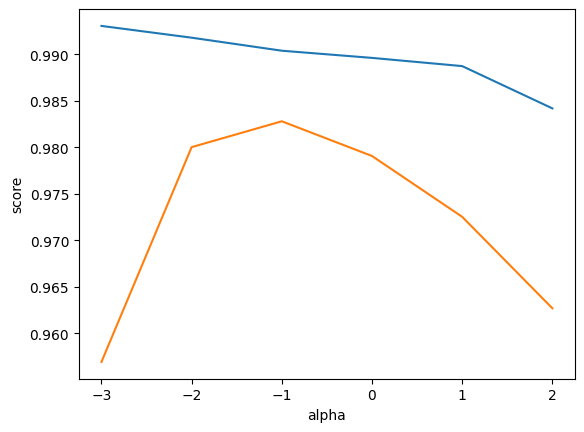

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alphaList), train_score)
plt.plot(np.log10(alphaList), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

[결과 분석]

train score, test score 차이가 최소인 alpha = 0.1일 때가 최적의 모델이다.

In [11]:
model = Ridge(alpha=0.1)
model.fit(train_scaled, train_target)
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### **2. Lasso**

In [12]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(train_scaled, train_target)
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


### 최적의 alpha 값 찾기

In [14]:
train_score=[]
test_score=[]

for alpha in alphaList:
  model = Lasso(alpha = alpha, max_iter=10000)
  model.fit(train_scaled, train_target)
  train_score.append(model.score(train_scaled, train_target))
  test_score.append(model.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


### Plot

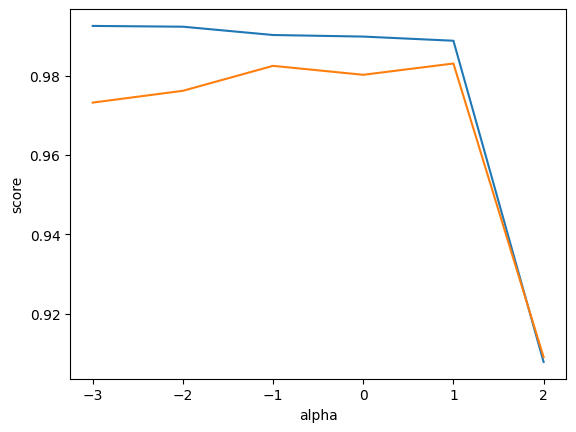

In [16]:
plt.plot(np.log10(alphaList), train_score)
plt.plot(np.log10(alphaList), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

[결과 분석]

train, test score차이가 최소인 alpha=10일때 최적의 모델이다.

In [17]:
model = Lasso(alpha = 10)
model.fit(train_scaled, train_target)
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [18]:
np.sum(model.coef_ == 0)

40

Lasso는 계수를 아예 0으로 만들 수 있다.

55개 특성 중 40개 특성 계수가 0이 되었음을 확인할 수 있다.

이런 특징 때문에 Lasso는 유용한 feature를 추출하기 위한 용도로 사용할 수 있다.